In [1]:
import sys

import numpy as np
from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
print('학습셋 이미지 수 : %d개'%(X_train.shape[0]))
print('테스트셋 이미지 수 : %d개'%(X_test.shape[0]))


학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


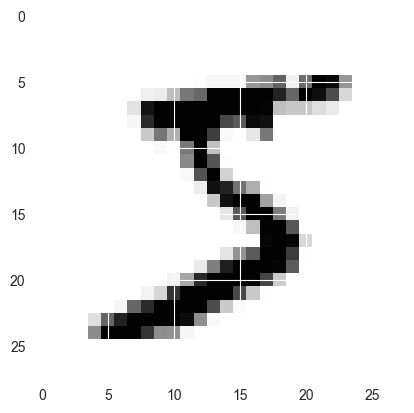

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [15]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s"%i)
    sys.stdout.write('/n')

TypeError: 'numpy.float64' object is not iterable

In [7]:
X_train = X_train.reshape(X_train.shape[0],784)

In [8]:
X_train = X_train.astype('float64')
X_train = X_train /255

In [9]:
X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255

In [10]:
print('class : %d'%(y_train[0]))

class : 5


In [11]:
#바이너리화 과정
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [12]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
#모델 구조를 설정
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical


In [16]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
#모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])


In [18]:
#모델 최적화를 위한 설정 구간입니다.
modelpath = '../data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)


In [19]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,
                    batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])




Epoch 1: val_loss improved from inf to 0.18354, saving model to ../data/model\MNIST_MLP.hdf5


D:\machine_learning\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18354 to 0.13057, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13057 to 0.11782, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11782 to 0.10500, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10500 to 0.09456, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09456 to 0.08563, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08563

Epoch 8: val_loss improved from 0.08563 to 0.08310, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08310

Epoch 10: val_loss improved from 0.08310 to 0.08024, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08024

Epoch 12: val_loss did not improve from 0.08024

Epoch 13: val_loss did not improve from 0.08024

Epoch 14: val_loss did not improve from 0.08024

Epoch 15: val_loss d

In [21]:
#테스트 정확도를 출력합니다.
print('\n TEST Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9809

 TEST Accuracy: 0.9809


In [29]:
#검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


[0.18353955447673798, 0.13056926429271698, 0.11782380938529968, 0.1050008162856102, 0.09455902874469757, 0.08563054352998734, 0.09658953547477722, 0.08310358971357346, 0.08457090705633163, 0.08024086058139801, 0.08678578585386276, 0.08062499016523361, 0.08693866431713104, 0.08322101086378098, 0.08293616026639938, 0.08529524505138397, 0.08317805826663971, 0.08658856898546219, 0.08529862761497498, 0.08695393800735474]


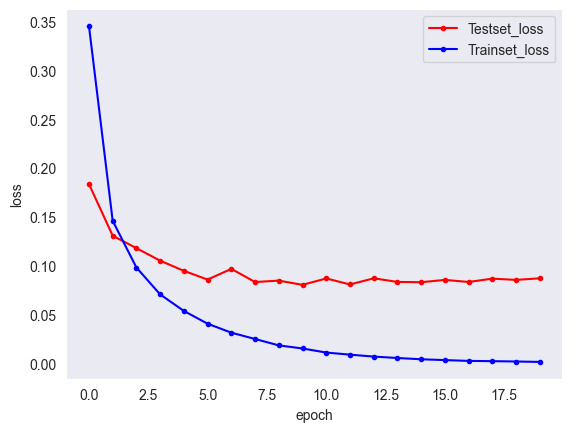

In [38]:
#그래프로 ㄱㄱㄱ
import numpy as np
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()